# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Datasets as DS
import NeuroDAVIS as nd
import DownstreamAnalysis as DA
from D2toD9 import Convert
from sklearn.metrics.pairwise import euclidean_distances

# Loading data

In [2]:
dir = 'D:/Research/NeuroDAVIS/Results/2D/NeuroDAVIS/'
X,y = DS.LoadData('Olympic')

In [3]:
c1=[0,1,2,3,4]
c2=['b','k','r','y','g']
cols = map(lambda x: c2[c1.index(x)], y)

In [4]:
cs = [i for i in list(cols)]

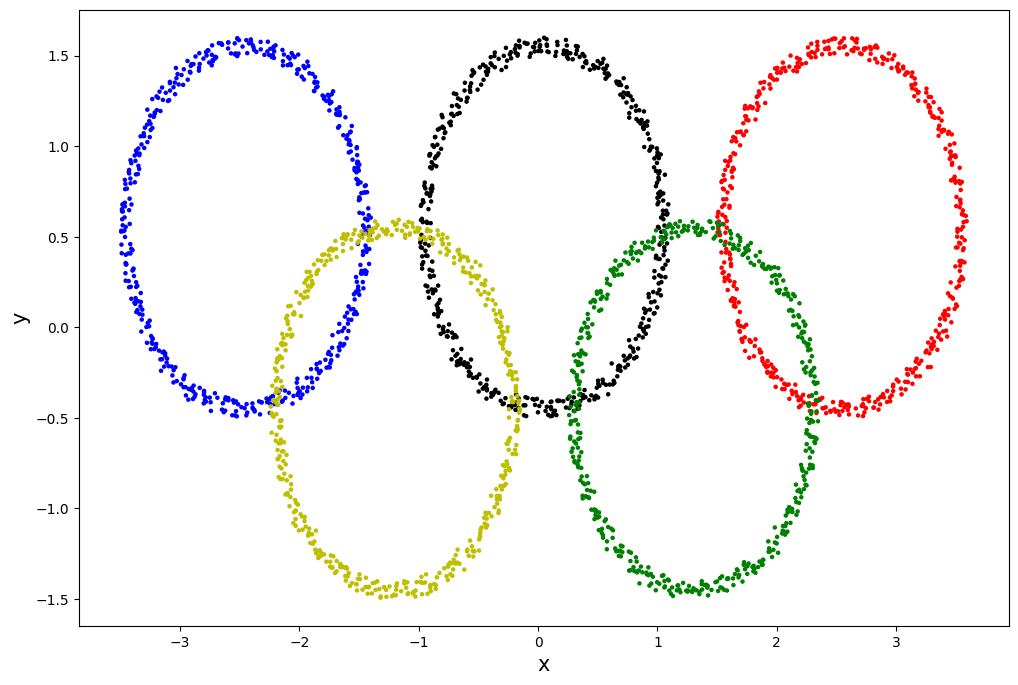

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c=cs,s=5)
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)
plt.savefig(dir+'Olympic.eps', dpi = 1200, format = 'eps')

# Applying NeuroDAVIS

In [6]:
data = np.eye(X.shape[0])
neuroDAVIS, Low = nd.NeuroDAVIS(data, X, dim=2, lambda_act=0.0001, lambda_weight=0.001, num_neuron=[10,6], bs=16, epoch=1000, sd=1, verbose=1)
X_embedding = Low.predict(data)

Epoch 1/1000
157/157 [==============================] - 2s 2ms/step - loss: 2.2217
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.1749
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.9888
Epoch 4/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.3676
Epoch 5/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.7046
Epoch 6/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.4205
Epoch 7/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.2925
Epoch 8/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.2081
Epoch 9/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.1563
Epoch 10/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.1230
Epoch 11/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.1059
Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0974
E

157/157 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 195/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0550
Epoch 196/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0542
Epoch 197/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0528
Epoch 198/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0527
Epoch 199/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0529
Epoch 200/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 201/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0539
Epoch 202/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 203/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0521
Epoch 204/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0520
Epoch 205/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.

# Plotting the results

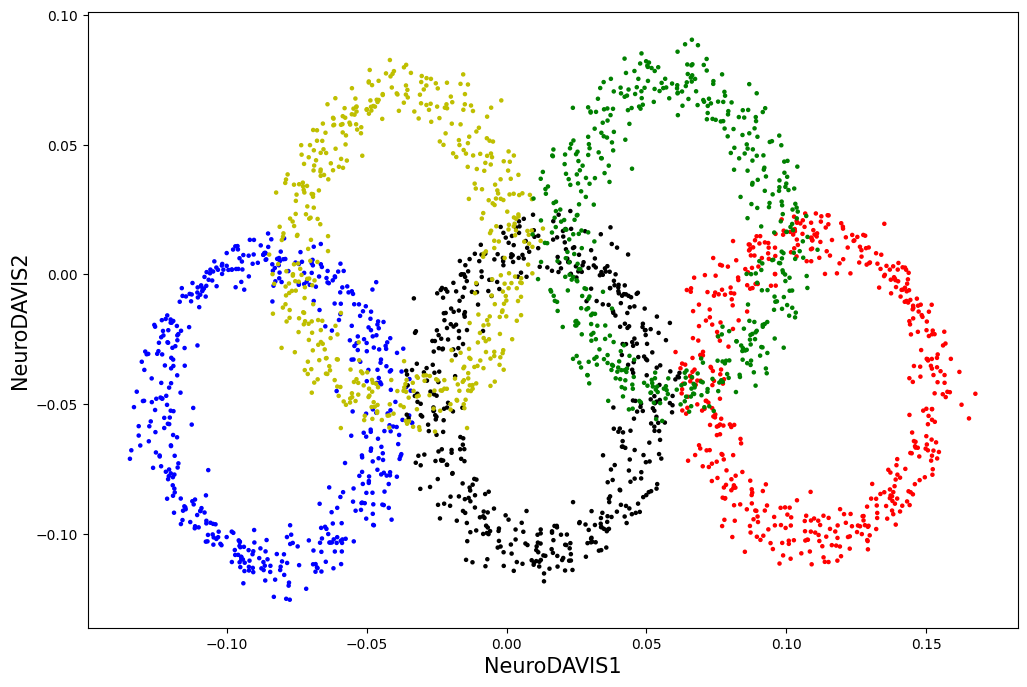

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(X_embedding[:,0],X_embedding[:,1],c=cs,s=5)
plt.xlabel("NeuroDAVIS1", fontsize=15)
plt.ylabel("NeuroDAVIS2", fontsize=15)
plt.savefig(dir+'Olympic_NeuroDAVIS.eps', dpi = 1200, format = 'eps')

# Spearman correlation

In [8]:
iteration = 10
score1 = []
dist_orig = np.square(euclidean_distances(X, X)).flatten()
for i in range(iteration):
    neuroDAVIS, Low = nd.NeuroDAVIS(data, X, dim=2, lambda_act=0.0001, lambda_weight=0.001, num_neuron=[10,6], bs=16, epoch=500, sd=0, verbose=0)
    X_embedding = Low.predict(data)
    dist_method = np.square(euclidean_distances(X_embedding, X_embedding)).flatten()
    score1.append(DA.correlation(dist_orig, dist_method))
#print(score1)

# Projecting data into high dimension and applying NeuroDAVIS
Using projection: $(x,y) \rightarrow (x+y,x-y,xy,x^2,y^2,x^2y,xy^2,x^3,y^3)$

In [11]:
X_9D = Convert(X)
data = np.eye(X.shape[0])
neuroDAVIS, Low = nd.NeuroDAVIS(data, X_9D, dim=2, lambda_act=0.0001, lambda_weight=0.001, num_neuron=[20,15], bs=16, epoch=500, sd=0, verbose=1)
X_embedding = Low.predict(data)

Epoch 1/500
157/157 [==============================] - 1s 2ms/step - loss: 33.5603
Epoch 2/500
157/157 [==============================] - 0s 2ms/step - loss: 32.5049
Epoch 3/500
157/157 [==============================] - 0s 2ms/step - loss: 32.2165
Epoch 4/500
157/157 [==============================] - 0s 2ms/step - loss: 31.8194
Epoch 5/500
157/157 [==============================] - 0s 2ms/step - loss: 30.8348
Epoch 6/500
157/157 [==============================] - 0s 2ms/step - loss: 28.5258
Epoch 7/500
157/157 [==============================] - 0s 2ms/step - loss: 24.2418
Epoch 8/500
157/157 [==============================] - 0s 2ms/step - loss: 18.7777
Epoch 9/500
157/157 [==============================] - 0s 2ms/step - loss: 13.6119
Epoch 10/500
157/157 [==============================] - 0s 2ms/step - loss: 10.1135
Epoch 11/500
157/157 [==============================] - 0s 2ms/step - loss: 7.6033
Epoch 12/500
157/157 [==============================] - 0s 2ms/step - loss: 5.7306
Epo

157/157 [==============================] - 0s 2ms/step - loss: 0.7494
Epoch 197/500
157/157 [==============================] - 0s 2ms/step - loss: 0.7578
Epoch 198/500
157/157 [==============================] - 0s 2ms/step - loss: 0.7549
Epoch 199/500
157/157 [==============================] - 0s 2ms/step - loss: 0.7501
Epoch 200/500
157/157 [==============================] - 0s 2ms/step - loss: 0.7483
Epoch 201/500
157/157 [==============================] - 0s 2ms/step - loss: 0.7501
Epoch 202/500
157/157 [==============================] - 0s 2ms/step - loss: 0.7536
Epoch 203/500
157/157 [==============================] - 0s 2ms/step - loss: 0.7529
Epoch 204/500
157/157 [==============================] - 0s 2ms/step - loss: 0.7445
Epoch 205/500
157/157 [==============================] - 0s 2ms/step - loss: 0.7409
Epoch 206/500
157/157 [==============================] - 0s 2ms/step - loss: 0.7398
Epoch 207/500
157/157 [==============================] - 0s 2ms/step - loss: 0.7412
Epoch 

157/157 [==============================] - 0s 2ms/step - loss: 0.6366
Epoch 391/500
157/157 [==============================] - 0s 2ms/step - loss: 0.6404
Epoch 392/500
157/157 [==============================] - 0s 2ms/step - loss: 0.6346
Epoch 393/500
157/157 [==============================] - 0s 2ms/step - loss: 0.6324
Epoch 394/500
157/157 [==============================] - 0s 2ms/step - loss: 0.6315
Epoch 395/500
157/157 [==============================] - 0s 2ms/step - loss: 0.6332
Epoch 396/500
157/157 [==============================] - 0s 2ms/step - loss: 0.6362
Epoch 397/500
157/157 [==============================] - 0s 2ms/step - loss: 0.6344
Epoch 398/500
157/157 [==============================] - 0s 2ms/step - loss: 0.6328
Epoch 399/500
157/157 [==============================] - 0s 2ms/step - loss: 0.6351
Epoch 400/500
157/157 [==============================] - 0s 2ms/step - loss: 0.6329
Epoch 401/500
157/157 [==============================] - 0s 2ms/step - loss: 0.6335
Epoch 

# Plotting the results

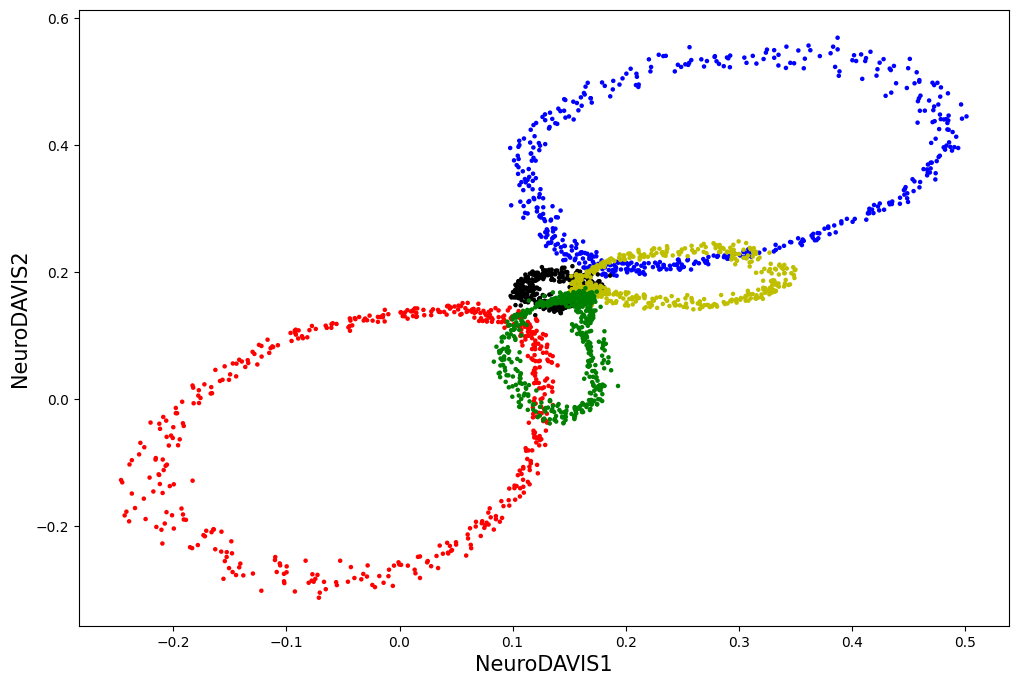

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(X_embedding[:,0],X_embedding[:,1],c=cs,s=5)
plt.xlabel("NeuroDAVIS1", fontsize = 15)
plt.ylabel("NeuroDAVIS2", fontsize = 15)
plt.savefig(dir+'Olympic_NeuroDAVIS_2D_9D_2D.eps', dpi = 1200, format = 'eps')

# Spearman correlation

In [15]:
iteration = 10
score2 = []
dist_orig = np.square(euclidean_distances(X_9D, X_9D)).flatten()
for i in range(iteration):
    neuroDAVIS, Low = nd.NeuroDAVIS(data, X_9D, dim=2, lambda_act=0.0001, lambda_weight=0.001, num_neuron=[20,15], bs=16, epoch=1000, sd=0, verbose=0)
    X_embedding = Low.predict(data)
    dist_method = np.square(euclidean_distances(X_embedding, X_embedding)).flatten()
    score2.append(DA.correlation(dist_orig, dist_method))
#print(score2)